# Apprentissage non supervisé

En apprentissage non supervisé, la machine analyse la structure des données X pour apprendre elle-même à réaliser certaines tâches.

## 1. K-means Clustering

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

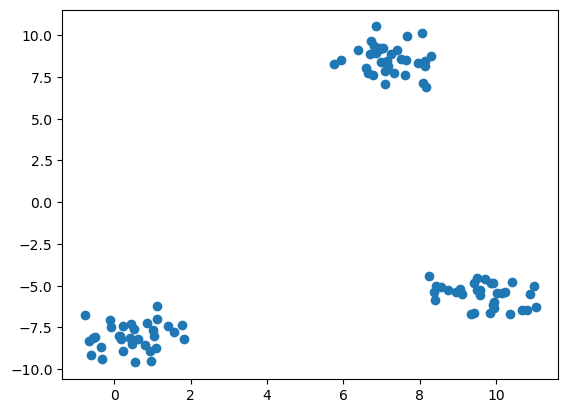

In [20]:
# Générations de données

X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1])

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [23]:
model.labels_ # model.predict(X)

array([0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2])

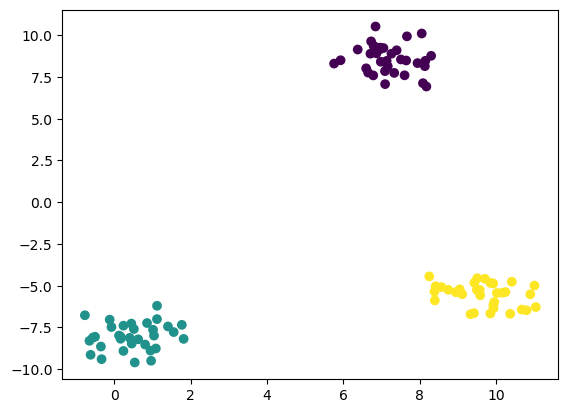

In [24]:
plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))

In [25]:
# Les centroids
model.cluster_centers_

array([[ 7.19330136,  8.58080841],
       [ 0.46383259, -8.03601848],
       [ 9.6667457 , -5.53917195]])

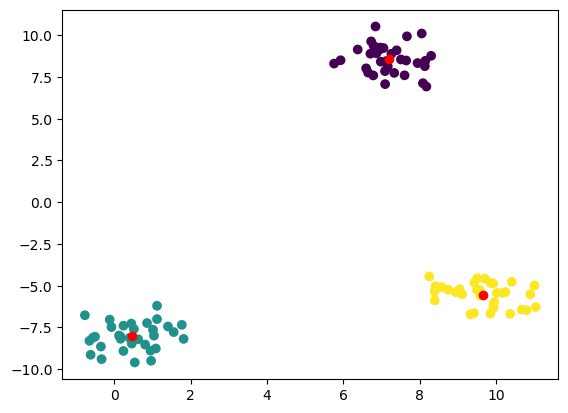

In [27]:
plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c = 'r')

In [29]:
model.inertia_

109.81082592786674

In [32]:
model.score(X)

-109.81082592786674

In [33]:
inertia = []
K_range = range(1, 21)
for k in K_range :
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Coûts du modèle (Inertia)')

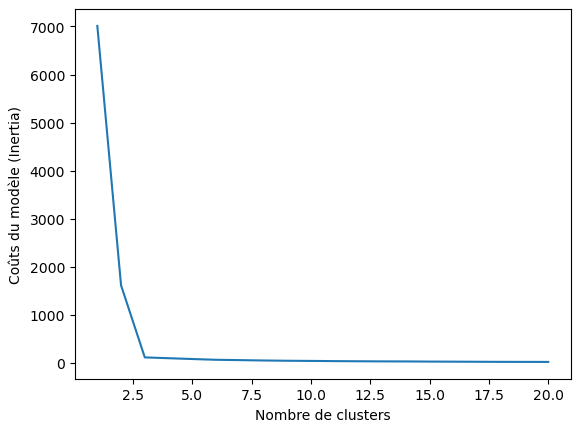

In [34]:
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coûts du modèle (Inertia)')

## 2. Isolation Forest: Anomaly Detection

Il s'agit de détecter les individus d'un échantillon dont les caractéristiques sont très éloignées de celles de autres.

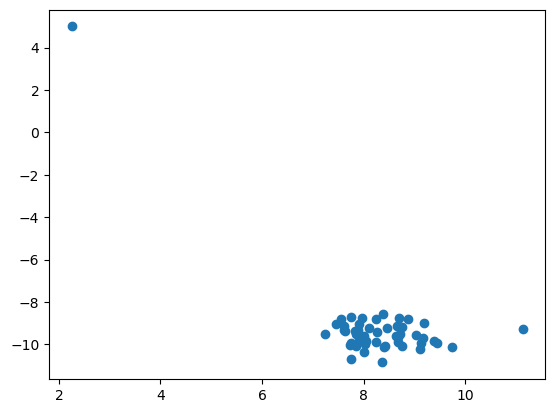

In [45]:
# Générations de données

X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.6)
X[-1, :] = np.array([2.25, 5])
plt.scatter(X[:,0], X[:,1])

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
model = IsolationForest(contamination=0.01) # contamination désigne le pourcentage des déchets ou anomalies dans le dataset
model.fit(X)

IsolationForest(contamination=0.01)

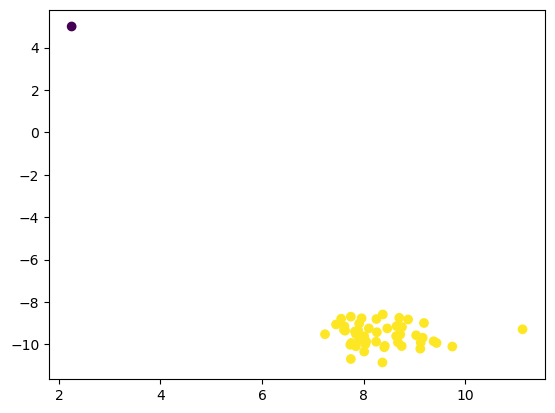

In [48]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

In [49]:
from sklearn.datasets import load_digits

In [50]:
digits = load_digits()
images = digits.images
x = digits.data
y = digits.target

print(x.shape) # x contient 1797 copies de chiffres (0 à 9) cahacune occupant 64 octets

(1797, 64)


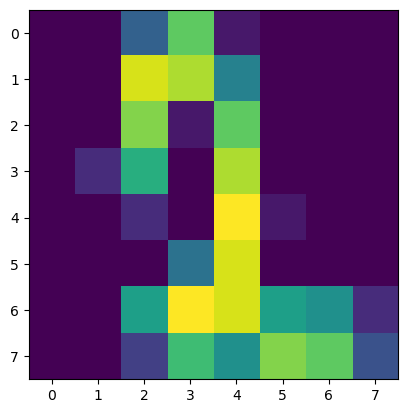

In [51]:
plt.imshow(images[12])

In [53]:
model = IsolationForest(random_state=0, contamination=0.02) # Toujours garder le taux de contamination < 5%
model.fit(x)

IsolationForest(contamination=0.02, random_state=0)

In [54]:
model.predict(x)

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
outlers = model.predict(x) == -1
images[outlers][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

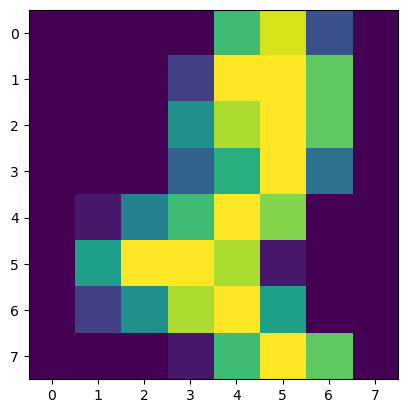

In [56]:
plt.imshow(images[outlers][0])

Text(0.5, 1.0, '2')

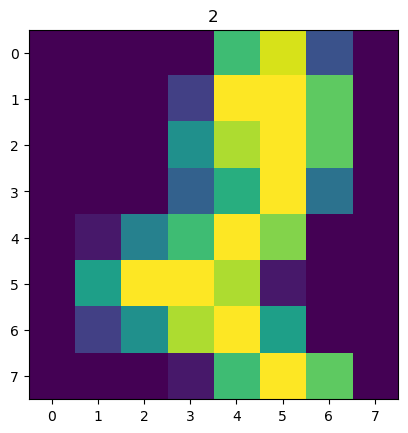

In [57]:
# L'image si dessus correspond à quel chiffre?
plt.imshow(images[outlers][0])
plt.title(y[outlers][0])

## 3. PCA, la réduction de la dimensionnalité

### 3.1 Visualisation

In [59]:
from sklearn.decomposition import PCA

In [62]:
model = PCA(n_components=2)
x_reduced = model.fit_transform(x)
x_reduced.shape

(1797, 2)

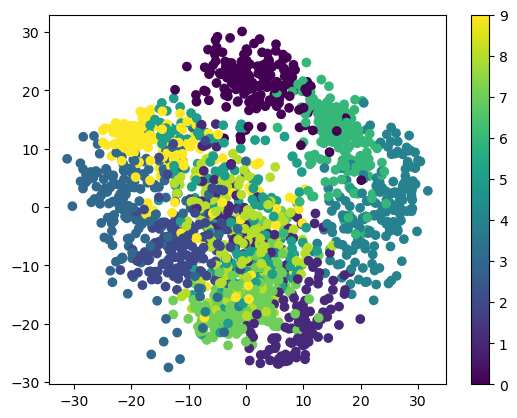

In [64]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c = y)
plt.colorbar()

In [65]:
model.components_ # combinaison linéaire entre les composantes et les variables de x

array([[ 0.00000000e+00, -1.73094684e-02, -2.23428852e-01,
        -1.35913291e-01, -3.30322970e-02, -9.66340946e-02,
        -8.32944787e-03,  2.26899985e-03, -3.20516499e-04,
        -1.19308914e-01, -2.44451680e-01,  1.48512754e-01,
        -4.67319443e-02, -2.17740739e-01, -1.48136849e-02,
         4.47779468e-03, -4.94136089e-05, -7.95419451e-02,
         8.33951389e-02,  2.15915343e-01, -1.72126805e-01,
        -1.63712097e-01,  2.86444412e-02,  4.23251799e-03,
         9.85488762e-05,  6.42319141e-02,  2.54093308e-01,
        -3.56770993e-02, -2.09462569e-01, -4.31311586e-02,
         5.13118660e-02,  2.13422730e-04,  0.00000000e+00,
         1.59950882e-01,  3.68690770e-01,  1.64406825e-01,
         8.52007897e-02,  3.72982764e-02,  2.15867005e-02,
         0.00000000e+00,  1.28865575e-03,  1.06945283e-01,
         3.03067453e-01,  2.47813024e-01,  2.09637291e-01,
         1.22325159e-02, -3.69458438e-02,  1.61485044e-03,
         6.93023485e-04, -8.35144641e-03, -5.58599097e-0

### 3.2 Compression de données

In [66]:
x.shape

(1797, 64)

In [67]:
Model = PCA(n_components=64)
x_reduced = Model.fit_transform(x)

In [68]:
# Pourcentage de la variance préservée par chacune des composantes
Model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [69]:
# Cumule des variances conservées
np.cumsum(Model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

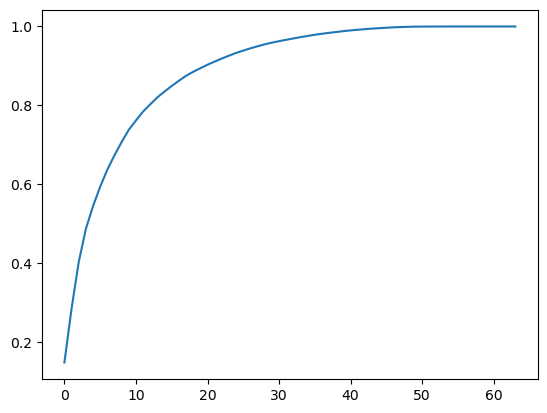

In [70]:
# Représentation des variances cumulées
plt.plot(np.cumsum(Model.explained_variance_ratio_))

In [71]:
# A partir de quelle composante principale atteint-on 99% de variance cumulée
np.argmax(np.cumsum(Model.explained_variance_ratio_) > 0.99)

40

In [72]:
# On entraine à nouveau notre modèle pour compresser les données tout en conservant 99% de leur variance
model = PCA(n_components=40)
x_reduced = model.fit_transform(x)

In [73]:
x_recovered = model.inverse_transform(x_reduced)

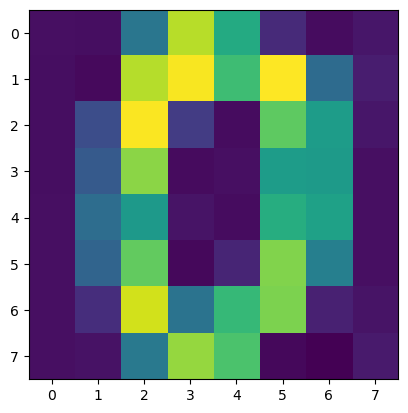

In [75]:
plt.imshow(x_recovered[0].reshape((8,8)))

In [76]:
# Conserver 95% de la variance
model = PCA(n_components=0.95)
x_reduced = model.fit_transform(x)

In [77]:
x_recovered = model.inverse_transform(x_reduced)

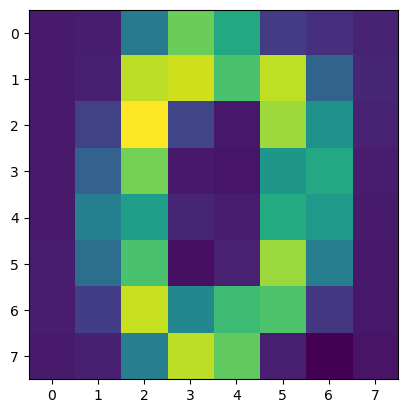

In [78]:
plt.imshow(x_recovered[0].reshape((8,8)))

In [80]:
# Nombre de composantes nécessaire pour atteindre 95%
model.n_components_

29